<div style="background-color: #c34a4a; color: #FFFFFF; padding: 5px; text-align: center; border-radius: 15px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.5);">
  <h1 style="margin: 0; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-weight: bold; font-size: 32px;">Forecasting Rainfall</h1>
  <p style="margin: 10px 0; font-size: 18px; font-style: italic; text-align: center;">A Machine Learning Approach</p>
</div>




<!-- This is your first markdown cell -->

<div style="margin-bottom: 35px;"></div>

<!-- This is your second markdown cell -->


<div style="background-color: #2D2D2D; color: #FFFFFF; padding: 10px; text-align: center; border-radius: 15px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0);">
  <h2 style="margin: 0; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-weight: bold;">BUSINESS UNDERSTANDING</h2>
</div>


The goal of our study is to develop  machine learning models capable of predicting whether it will rain tomorrow based on the weather data for the current day in major cities. Timely and accurate forecasting is crucial as it proactively reduces human and financial loss by enabling informed decision-making and pre measures. Through a series of experiments, this study evaluates various machine learning models to determine which one performs best for this task. By identifying the most effective model, we strive to provide reliable rainfall predictions that empower individuals and organizations to take proactive measures in response to changing weather conditions.

<!-- This is your first markdown cell -->

<div style="margin-bottom: 5px;"></div>

<!-- This is your second markdown cell -->

<div style="background-color: #2D2D2D; color: #FFFFFF; padding: 10px; text-align: center; border-radius: 15px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0);">
  <h2 style="margin: 0; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-weight: bold;">Table of Contents</h2>
</div>


[1. Data Exploration](#-1-Data-Exploration)

[2. Handling Class Imbalance and Missing Data](#2-Handling-Class-Imbalance-Missing-Data )

[3. Imputation and Transformation](#3-Imputation-and-Transformation)

[4. Feature Selection](#4-Feature-Selection)

[5. Training Different Models](#5-Training-Different-Models)

[6. Evaluating Model Performances](#6-Visualizing-Diffrent-Model-Performances)

[7. Model Comparison](#7-Model-Comparison)

[8. Conclusion](#8-results)

[8. ThankYou](#9-results)

In [42]:
# IMPORTING PACKAGES

import numpy as np
import pandas as pd
import time
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import itertools
import lightgbm as lg
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, roc_curve, classification_report
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions


In [9]:
# LOADING PRODUCT META DATA
complete_data = pd.read_csv('/Users/akshay/projects/time_series_forcasting/rainfall_pred/weatherAUS.csv')
metadata_df = complete_data.copy()
metadata_df


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
142189  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
142190  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
142191  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
142192  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN           W           44.0          W  ...        22.0   
1            NaN         WNW           44.0        NNW  ...        25.0   
2            NaN         WSW           46.0          W  ...        30.0   
3            NaN          NE           24.0         SE  ...        16.0   
4            NaN           W           41.0        ENE  ...        33.0   
...          ...         ...            ...        ...  ...         ...   
142188       NaN           E           31.0        ESE  ...        27.0   
142189       NaN           E           31.0         SE  ...        24.0   
142190       NaN         NNW           22.0         SE  ...        21.0   
142191       NaN           N           37.0         SE  ...        24.0   
142192       NaN          SE           28.0        SSE  ...        24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0            1007.7       1007.1       8.0       NaN     16.9     21.8   
1            1010.6       1007.8       NaN       NaN     17.2     24.3   
2            1007.6       1008.7       NaN       2.0     21.0     23.2   
3            1017.6       1012.8       NaN       NaN     18.1     26.5   
4            1010.8       1006.0       7.0       8.0     17.8     29.7   
...             ...          ...       ...       ...      ...      ...   
142188       1024.7       1021.2       NaN       NaN      9.4     20.9   
142189       1024.6       1020.3       NaN       NaN     10.1     22.4   
142190       1023.5       1019.1       NaN       NaN     10.9     24.5   
142191       1021.0       1016.8       NaN       NaN     12.5     26.1   
142192       1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RISK_MM  RainTomorrow  
0              No      0.0            No  
1              No      0.0            No  
2              No      0.0            No  
3              No      1.0            No  
4              No      0.2            No  
...           ...      ...           ...  
142188         No      0.0            No  
142189         No      0.0            No  
142190         No      0.0            No  
142191         No      0.0            No  
142192         No      0.0            No  

[142193 rows x 24 columns]

In [10]:

metadata_df.head(), metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

(         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
 0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
 1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
 2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
 3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
 4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
 
   WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
 0           W           44.0          W  ...        22.0       1007.7   
 1         WNW           44.0        NNW  ...        25.0       1010.6   
 2         WSW           46.0          W  ...        30.0       1007.6   
 3          NE           24.0         SE  ...        16.0       1017.6   
 4           W           41.0        ENE  ...        33.0       1010.8   
 
    Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
 0     

In [11]:
print(f'Total number of rows in the dataset: {metadata_df.shape[0]}. Total number of columns: {metadata_df.shape[1]}.')


Total number of rows in the dataset: 142193. Total number of columns: 24.


In [12]:
# Convert 'RainToday' column values from object to binary class: 'No' becomes 0 and 'Yes' becomes 1.
metadata_df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace=True)

# Convert 'RainTomorrow' column values from object to binary class: 'No' becomes 0 and 'Yes' becomes 1.
metadata_df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace=True)


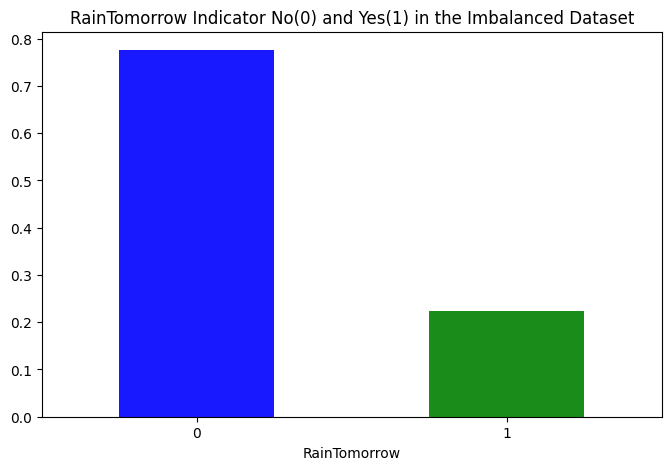

In [13]:
# check if the dataset is unbalanced or balanced.

fig = plt.figure(figsize = (8,5))
metadata_df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['blue','green'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

<!-- This is your first markdown cell -->

<div style="margin-bottom: 35px;"></div>

<!-- This is your second markdown cell -->

<div style="background-color: #2D2D2D; color: #FFFFFF; padding: 10px; text-align: center; border-radius: 15px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0);">
  <h2 style="margin: 0; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-weight: bold;">Handling Class Imbalance and Missing Data</h2>
</div>

We can observe that the presence of “0” and “1” is almost in the 78:22 ratio. We need to either downsample the majority or oversample the minority to balance it. Since the dataset is relatively small, downsampling the majority class wouldn't be the best approach. Therefore, we'll opt for oversampling the minority class.

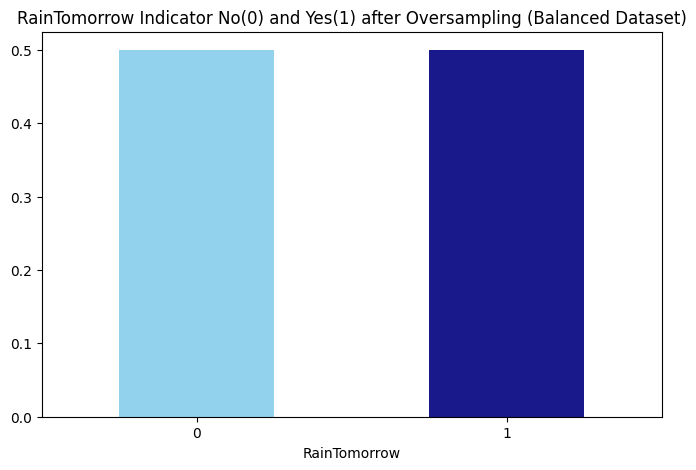

In [14]:
# This code uses the resample method from sklearn.utils to balance the dataset by oversampling the minority class 

no = metadata_df[metadata_df.RainTomorrow == 0]
yes = metadata_df[metadata_df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
balanced_dataset = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
balanced_dataset.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()


<Axes: >

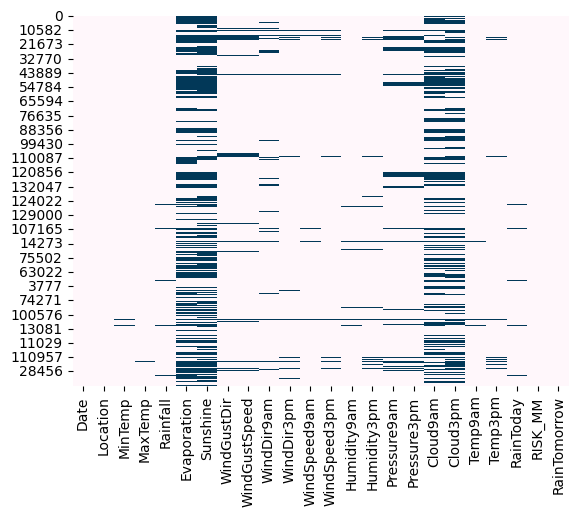

In [15]:
# check missing data in the dataset using seaborn

sns.heatmap(balanced_dataset.isnull(), cbar=False, cmap='PuBu')

In [16]:
# “Evaporation”, “Sunshine”, “Cloud9am”, “Cloud3pm” are the features with a high missing values. So we will check their  missing percentages.

total = balanced_dataset.isnull().sum().sort_values(ascending=False)
percent = (balanced_dataset.isnull().sum()/balanced_dataset.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)


Total   Percent
Sunshine     104831  0.475140
Evaporation   95411  0.432444
Cloud3pm      85614  0.388040
Cloud9am      81339  0.368664

**<font color='red'>NOTE:</font>**

- We observe that the 4 features have less than 50 per cent missing data. So instead of rejecting them completely, we’ll consider them in our model with proper imputation.

<!-- This is your first markdown cell -->

<div style="margin-bottom: 35px;"></div>

<!-- This is your second markdown cell -->

<div style="background-color: #2D2D2D; color: #FFFFFF; padding: 10px; text-align: center; border-radius: 15px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0);">
  <h2 style="margin: 0; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-weight: bold;">Imputation and Transformation</h2>
</div>

In [17]:
# Columns of object data type in the oversampled dataset.

balanced_dataset.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [18]:
# Fill missing values in categorical Columns with the mode value of each column.

balanced_dataset['Date'] = balanced_dataset['Date'].fillna(balanced_dataset['Date'].mode()[0])
balanced_dataset['Location'] = balanced_dataset['Location'].fillna(balanced_dataset['Location'].mode()[0])
balanced_dataset['WindGustDir'] = balanced_dataset['WindGustDir'].fillna(balanced_dataset['WindGustDir'].mode()[0])
balanced_dataset['WindDir9am'] = balanced_dataset['WindDir9am'].fillna(balanced_dataset['WindDir9am'].mode()[0])
balanced_dataset['WindDir3pm'] = balanced_dataset['WindDir3pm'].fillna(balanced_dataset['WindDir3pm'].mode()[0])

In [19]:
# Convert categorical features to continuous features with Label Encoding using sklearn.preprocessing

lencoders = {}

for col in balanced_dataset.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    balanced_dataset[col] = lencoders[col].fit_transform(balanced_dataset[col])


In [20]:
warnings.filterwarnings("ignore")

# impute the missing values using the Multiple Imputation by Chained Equations (MICE) package.

MiceImputed = balanced_dataset.copy(deep=True)
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(balanced_dataset)

In [21]:
# Detecting outliers with inter quartile range (IQR).

Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1

print(IQR)



Date             1535.000000
Location           25.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.119679
Sunshine            5.947404
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.800000
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.681346
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RISK_MM             5.200000
RainTomorrow        1.000000
dtype: float64


In [22]:
# Removing outliers from the dataset

MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(156852, 24)

<Axes: >

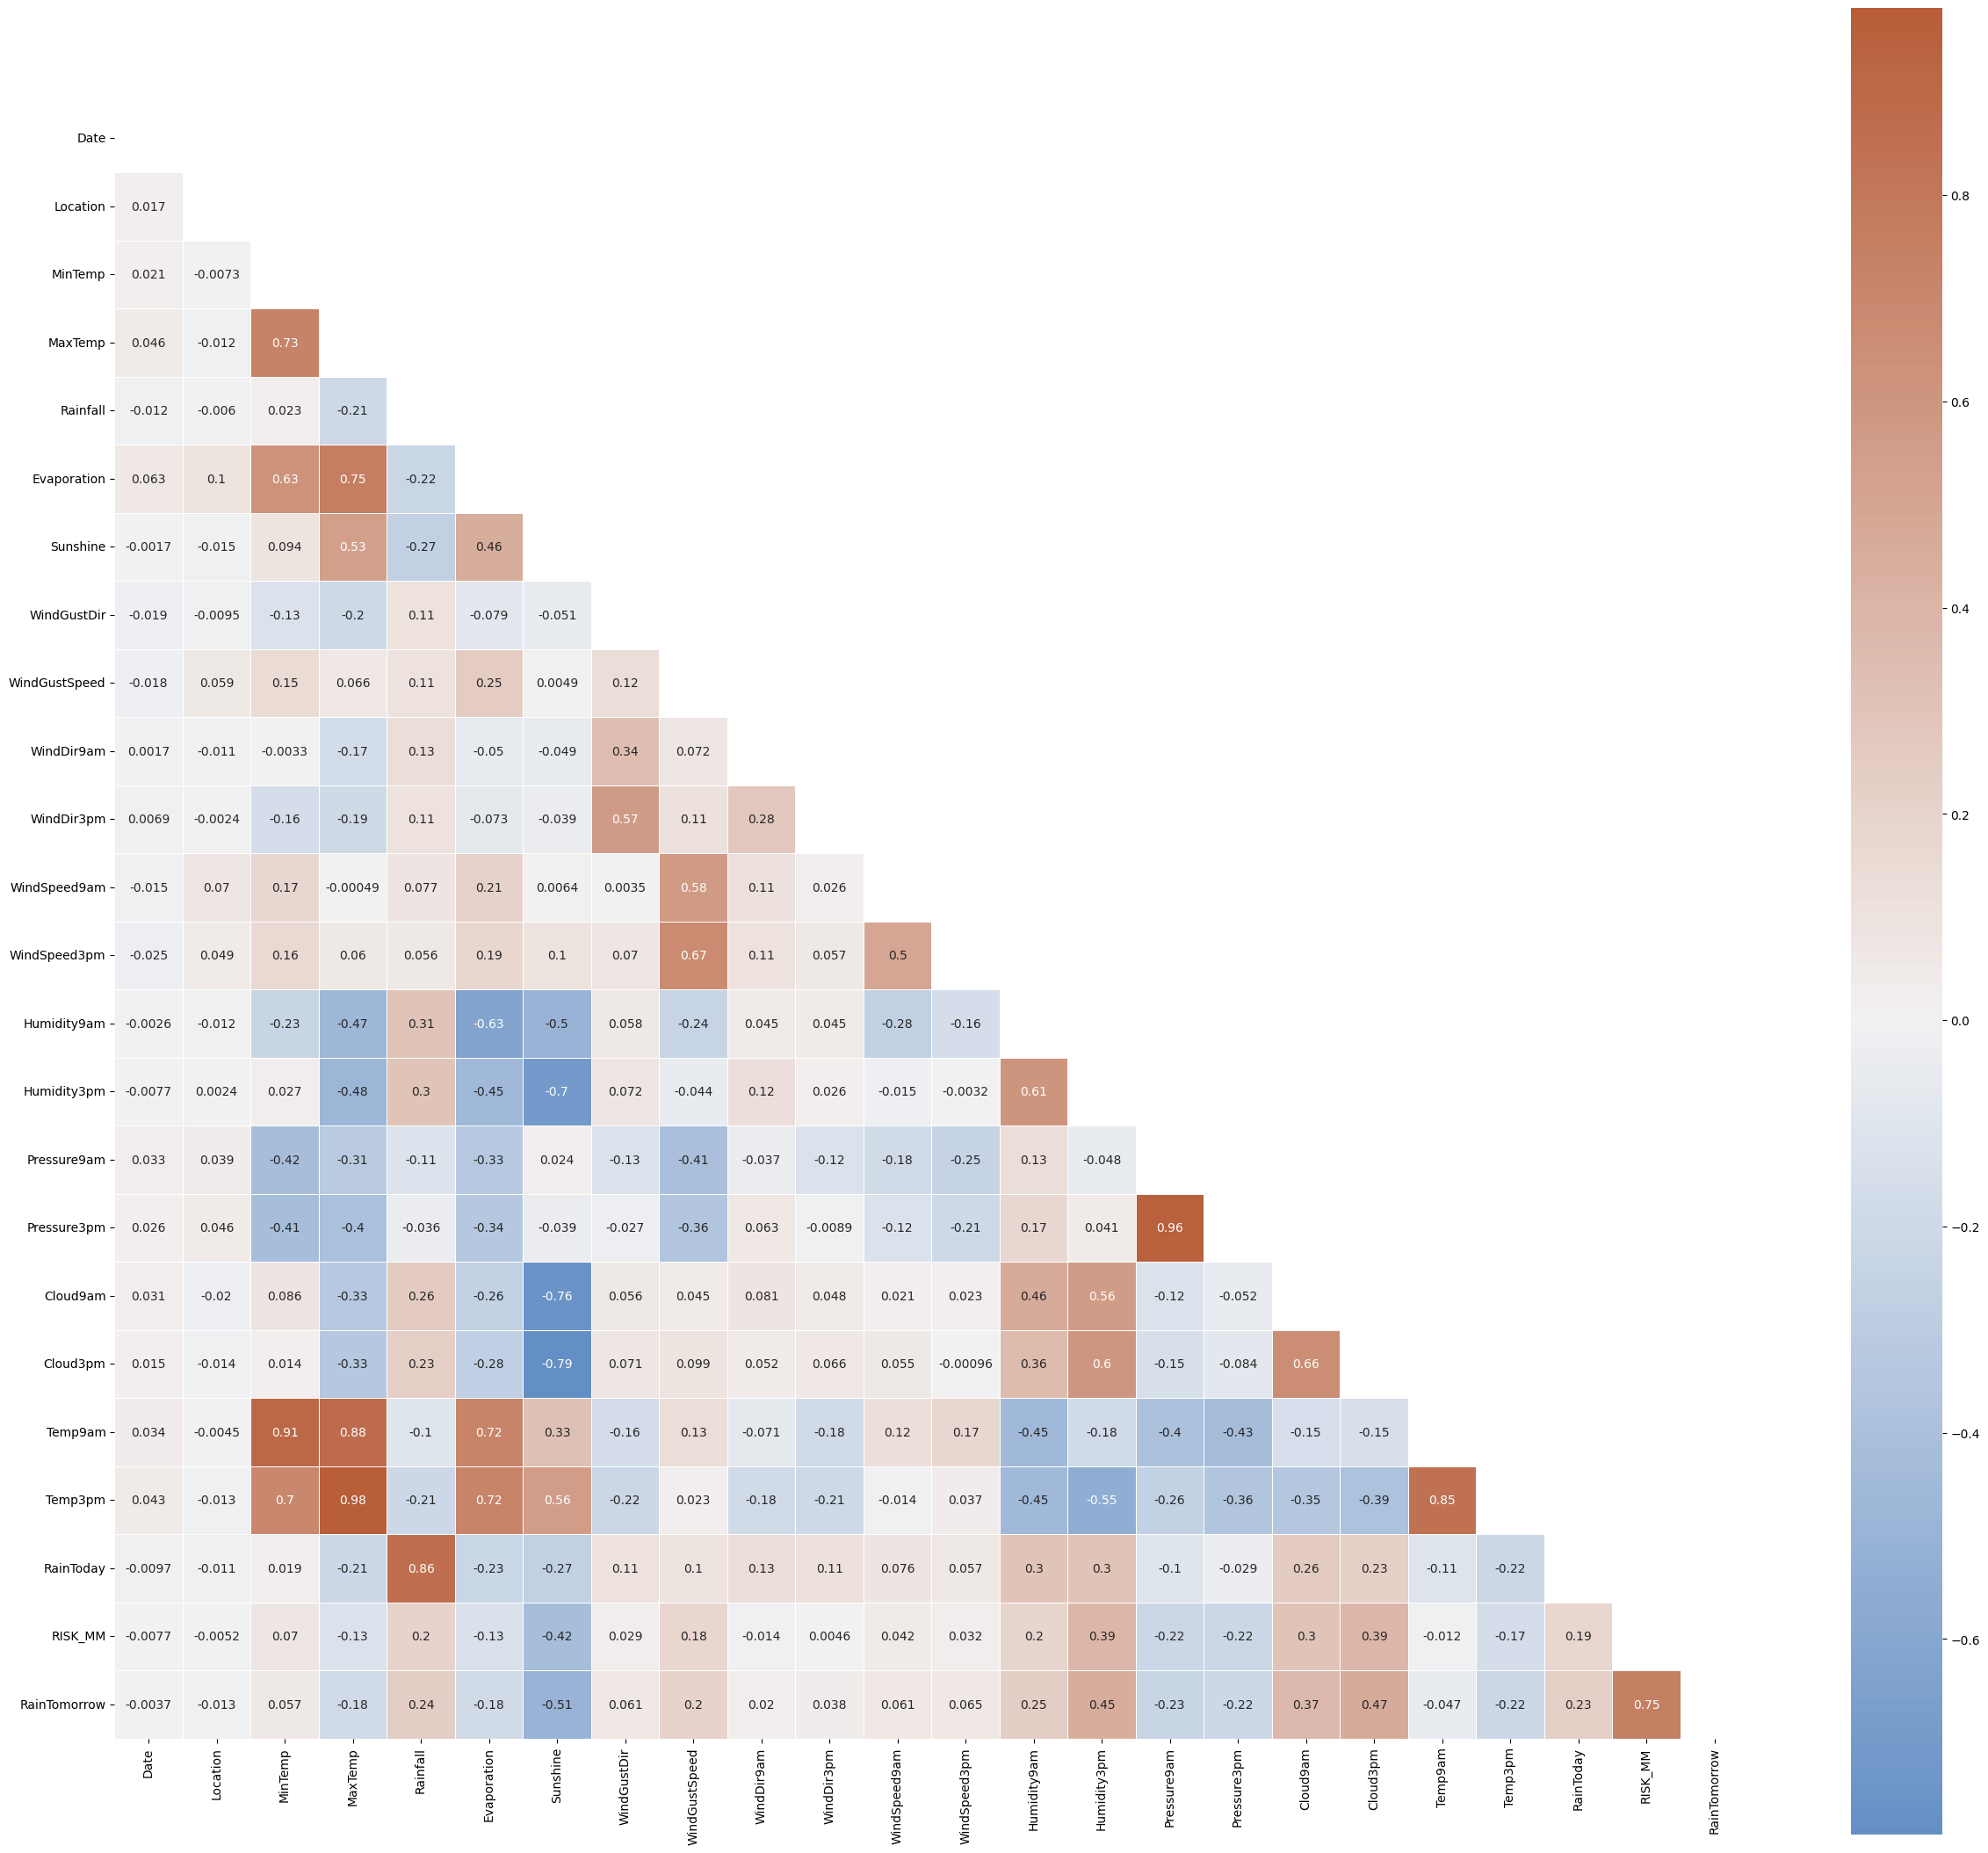

In [67]:
# Correlation Heatmap

corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

**<font color='red'>NOTE:</font> The following feature pairs have a strong correlation with each other:** 

- MaxTemp and MinTemp
- Pressure9h and pressure3h
- Temp9am and Temp3pm
- Evaporation and MaxTemp
- MaxTemp and Temp3pm

But in no case is the correlation value equal to a perfect “1”. We are therefore not removing any functionality.


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


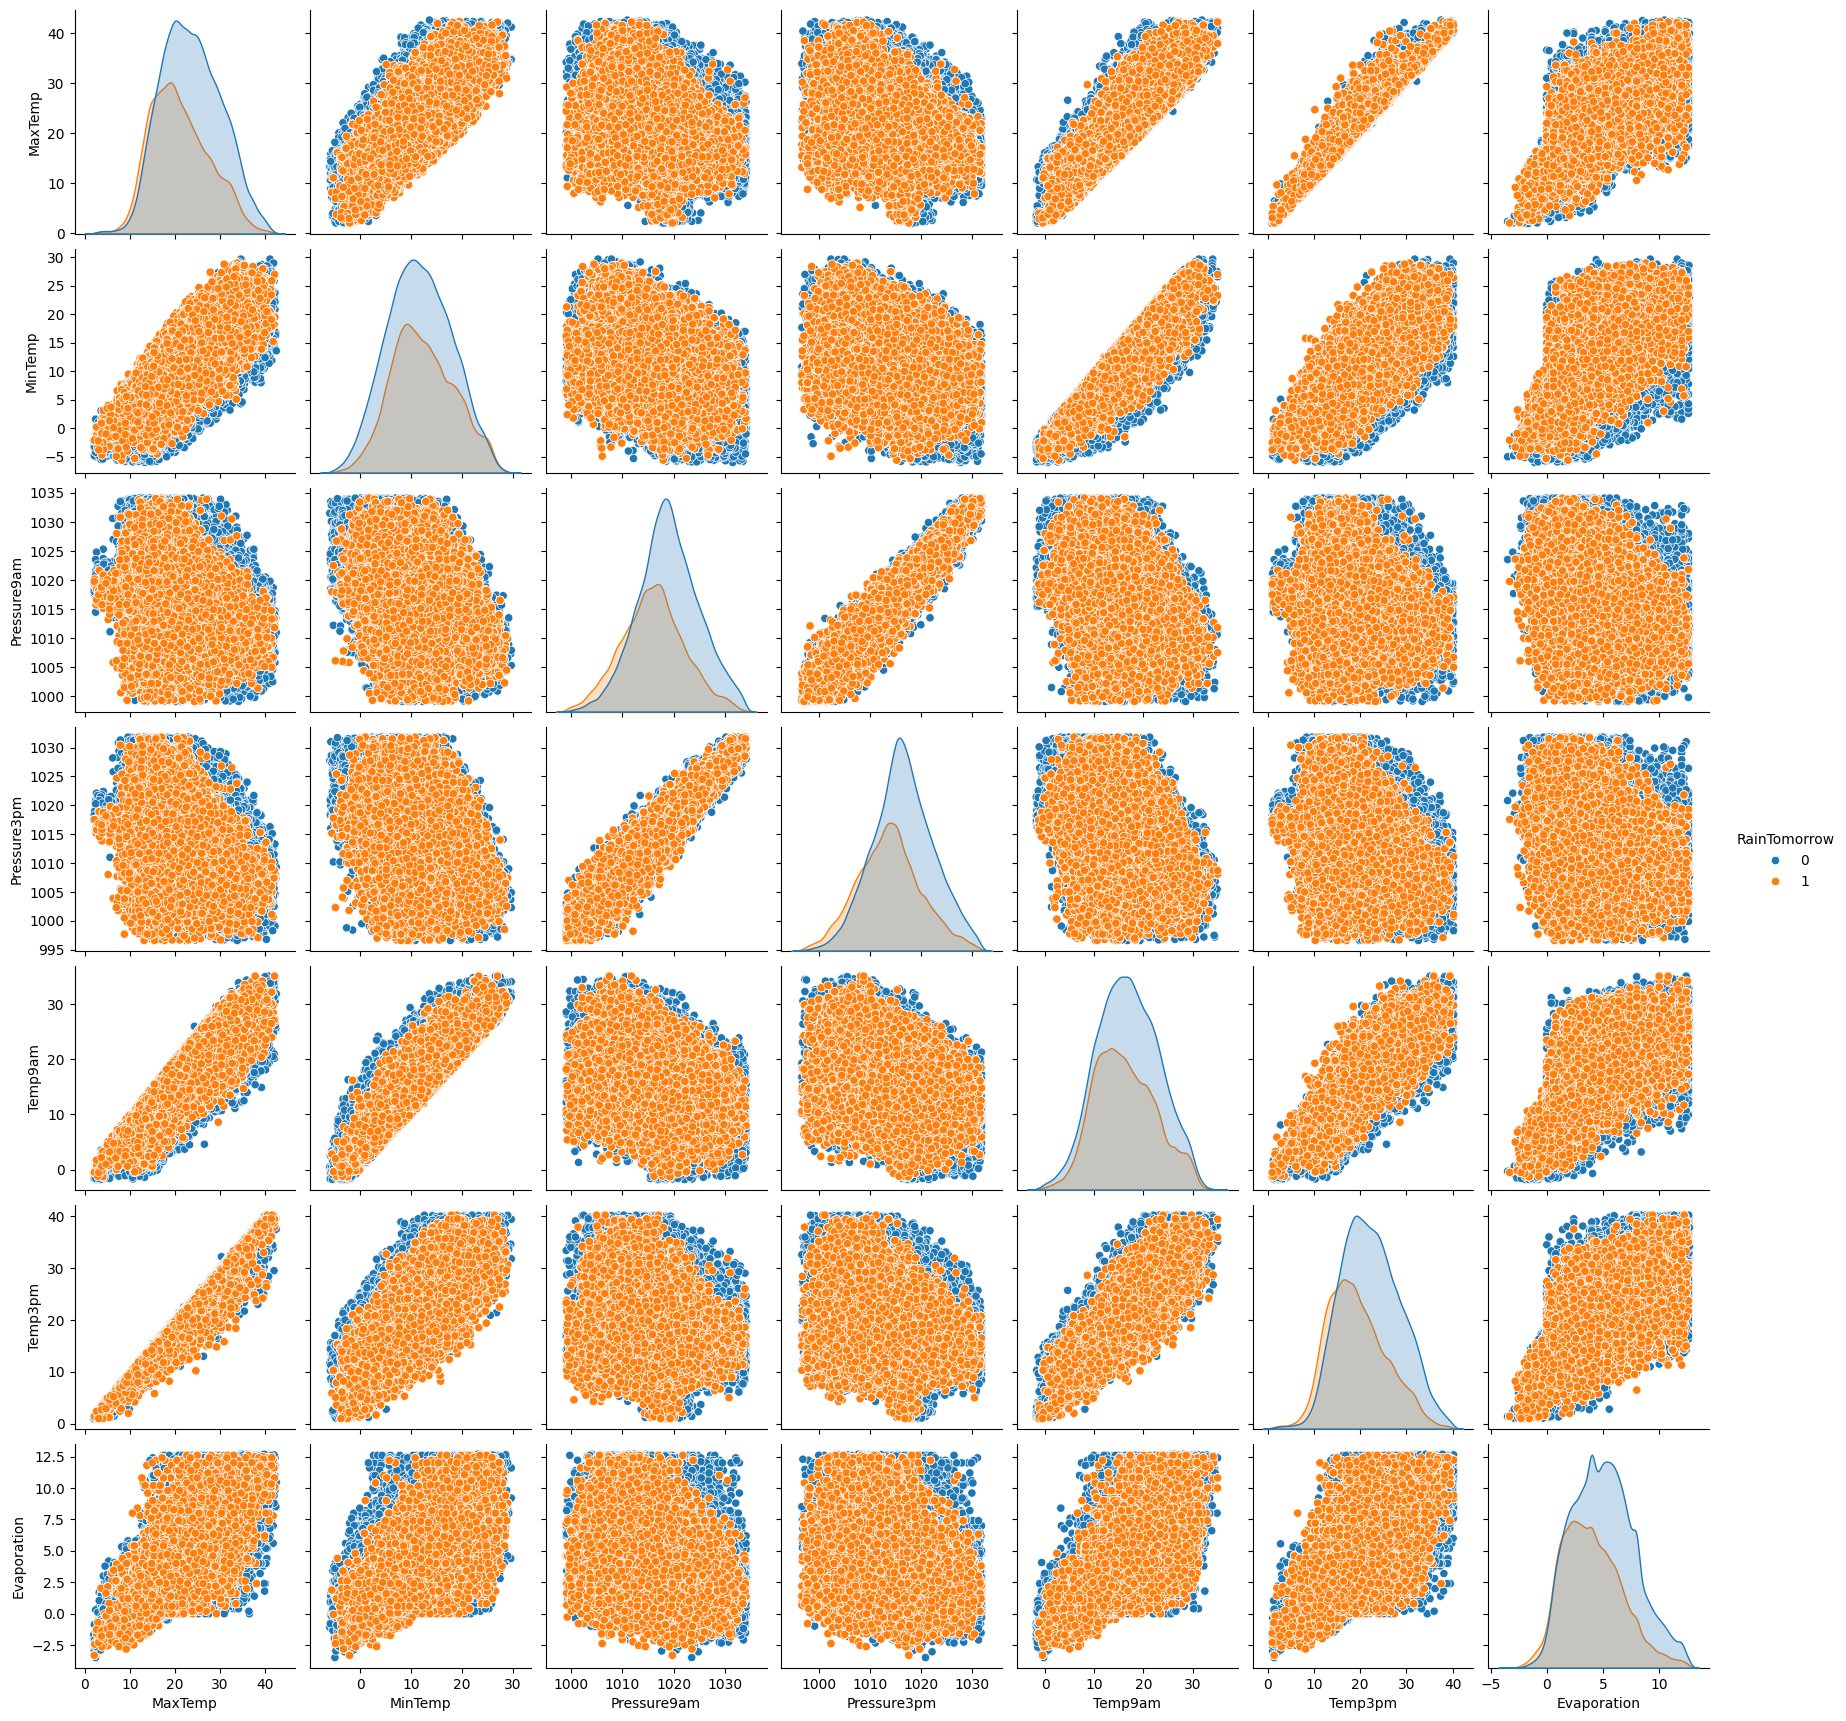

In [69]:
sns.pairplot( data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )

<!-- This is your first markdown cell -->

<div style="margin-bottom: 35px;"></div>

<!-- This is your second markdown cell -->



<div style="background-color: #2D2D2D; color: #FFFFFF; padding: 10px; text-align: center; border-radius: 15px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0);">
  <h2 style="margin: 0; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-weight: bold;">Feature Selection</h2>
</div>

In [23]:
# Standardizing data using Min-Max scaling

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [24]:
# Splitting X as features and y as the target label

X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]

In [25]:
# Feature selection using the Chi-Square method

selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday', 'RISK_MM'],
      dtype='object')


In [26]:
# Feature selection using wrapping method (random forest)

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'Cloud3pm', 'RISK_MM']
[0.00205993 0.00215407 0.00259089 0.00367568 0.0102656  0.00252838
 0.05894157 0.00143001 0.00797518 0.00177178 0.00167654 0.0014278
 0.00187743 0.00760691 0.03091966 0.00830365 0.01193018 0.02113544
 0.04962418 0.00270103 0.00513723 0.00352198 0.76074491]


<!-- This is your first markdown cell -->

<div style="margin-bottom: 35px;"></div>

<!-- This is your second markdown cell -->

<div style="background-color: #2D2D2D; color: #FFFFFF; padding: 10px; text-align: center; border-radius: 15px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0);">
  <h2 style="margin: 0; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-weight: bold;">Training Different Models</h2>
</div>

In [31]:
# Define features and target variables

features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
                        'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                        'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
                        'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into test and train
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [32]:
# function to plot the ROC curve

def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [33]:
# function to run and evaluate a machine learning model

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)

    return model, accuracy, roc_auc, coh_kap, time_taken

<!-- This is your first markdown cell -->

<div style="margin-bottom: 50px;"></div>

<!-- This is your second markdown cell -->

<span style="color: #c46637; font-size: 32px;">1. Logistic Regression</span>



Accuracy = 0.78963609007217
ROC Area under Curve = 0.76976981489154
Cohen's Kappa = 0.5494516226632338
Time taken = 2.69836688041687
              precision    recall  f1-score   support

           0    0.80822   0.85949   0.83307     23948
           1    0.75520   0.68005   0.71566     15265

    accuracy                        0.78964     39213
   macro avg    0.78171   0.76977   0.77436     39213
weighted avg    0.78758   0.78964   0.78736     39213



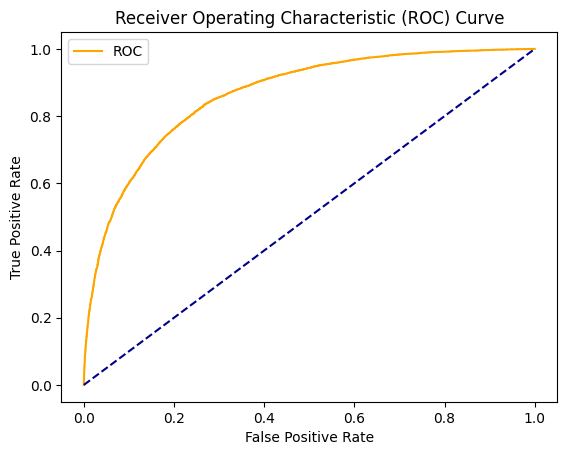

In [34]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)


<span style="color: #c46637; font-size: 32px;">2. Decision Tree </span>



Accuracy = 0.8646367276158416
ROC Area under Curve = 0.8623721975733971
Cohen's Kappa = 0.7179741706432639
Time taken = 0.4373471736907959
              precision    recall  f1-score   support

           0    0.90252   0.87260   0.88731     23948
           1    0.81001   0.85215   0.83055     15265

    accuracy                        0.86464     39213
   macro avg    0.85627   0.86237   0.85893     39213
weighted avg    0.86651   0.86464   0.86521     39213



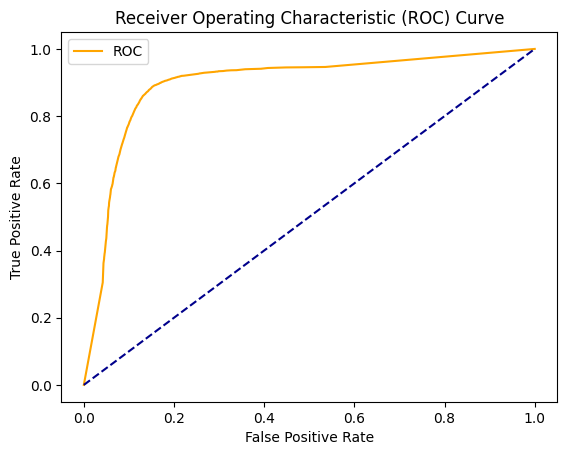

In [35]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)


<span style="color: #c46637; font-size: 32px;">3. Neural Network</span>


Accuracy = 0.8805753194093795
ROC Area under Curve = 0.8719059791684254
Cohen's Kappa = 0.747567429974328
Time taken = 54.84096002578735
              precision    recall  f1-score   support

           0    0.89524   0.91106   0.90308     23948
           1    0.85649   0.83275   0.84445     15265

    accuracy                        0.88058     39213
   macro avg    0.87587   0.87191   0.87377     39213
weighted avg    0.88016   0.88058   0.88026     39213



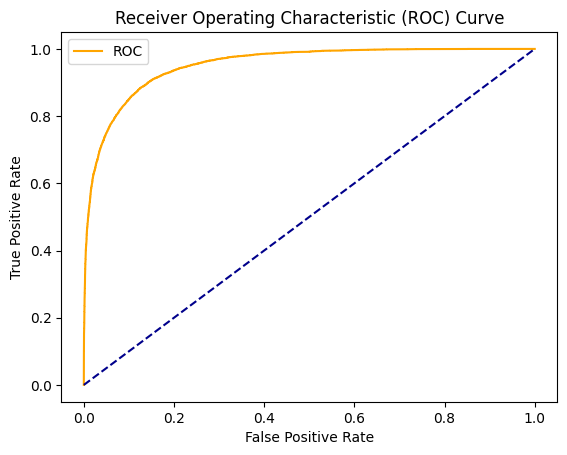

In [55]:
# Neural Network
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'relu',
             'solver': 'lbfgs',
             'max_iter': 250}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)



<span style="color: #c46637; font-size: 32px;">4. Random Forest</span>

Accuracy = 0.9280595720806876
ROC Area under Curve = 0.9265770863620824
Cohen's Kappa = 0.8493714659078331
Time taken = 21.939631938934326
              precision    recall  f1-score   support

           0    0.94812   0.93327   0.94064     23948
           1    0.89783   0.91988   0.90872     15265

    accuracy                        0.92806     39213
   macro avg    0.92297   0.92658   0.92468     39213
weighted avg    0.92854   0.92806   0.92821     39213



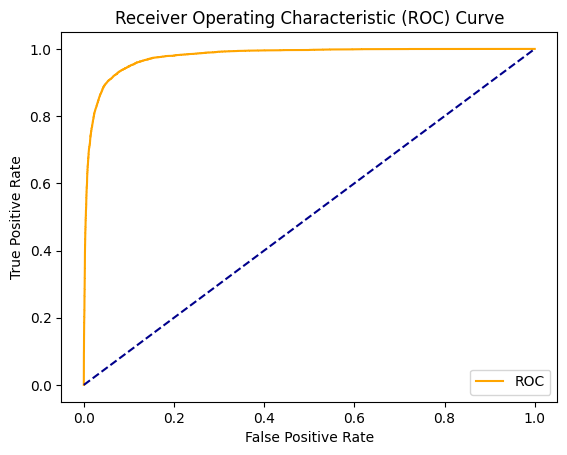

In [57]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

<span style="color: #c46637; font-size: 32px;">5. Light GBM </span>

[LightGBM] [Info] Number of positive: 45912, number of negative: 71727
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4308
[LightGBM] [Info] Number of data points in the train set: 117639, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.390279 -> initscore=-0.446141
[LightGBM] [Info] Start training from score -0.446141
Accuracy = 0.8684619896462907
ROC Area under Curve = 0.860694163700355
Cohen's Kappa = 0.7228133047900757
Time taken = 1.9819540977478027
              precision    recall  f1-score   support

           0    0.88961   0.89577   0.89268     23948
           1    0.83469   0.82561   0.83013     15265

    accuracy                        0.86846     39213
   macro avg    0.86215   0.86069   0.86140     39213
weighted avg    0.86823   0.86846   0.86833     39213



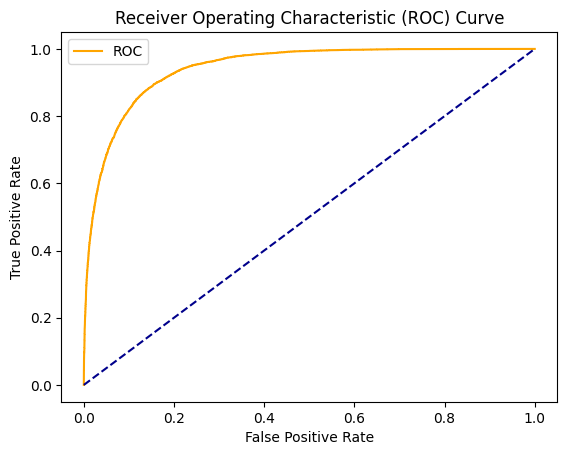

In [38]:
# Light GBM
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95,
             'max_depth': 16,
             'min_split_gain': 0.1,
             'n_estimators': 200,
             'num_leaves': 50,
             'reg_alpha': 1.2,
             'reg_lambda': 1.2,
             'subsample': 0.95,
             'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

<span style="color: #c46637; font-size: 32px;">6. XGBoost  </span>

Accuracy = 0.9602682783770689
ROC Area under Curve = 0.9613312452665894
Cohen's Kappa = 0.91695620331956
Time taken = 7.497735977172852
              precision    recall  f1-score   support

           0    0.97793   0.95653   0.96711     23948
           1    0.93407   0.96613   0.94983     15265

    accuracy                        0.96027     39213
   macro avg    0.95600   0.96133   0.95847     39213
weighted avg    0.96085   0.96027   0.96038     39213



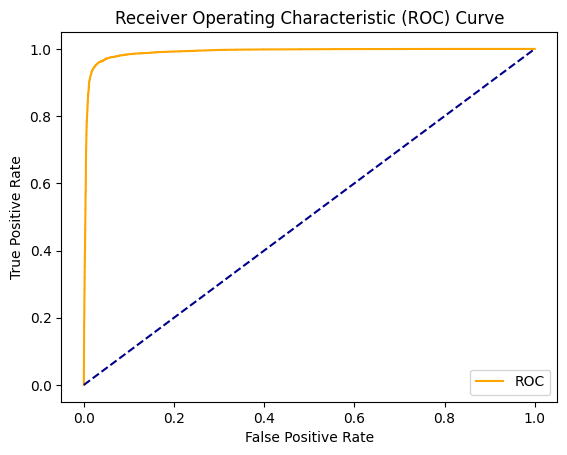

In [47]:
# XGBoost
import xgboost as xgb
params_xgb ={'n_estimators': 500,
             'max_depth': 32}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

<!-- This is your first markdown cell -->

<div style="margin-bottom: 35px;"></div>

<!-- This is your second markdown cell -->

<div style="background-color: #2D2D2D; color: #FFFFFF; padding: 10px; text-align: center; border-radius: 15px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0);">
  <h2 style="margin: 0; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-weight: bold;">Visualizing Different Model Performances</h2>
</div>


<!-- This is your first markdown cell -->

<div style="margin-bottom: 35px;"></div>

<!-- This is your second markdown cell -->

In [49]:
# Initialize classifiers and set their parameters

clf1 = LogisticRegression(random_state=12345)
clf2 = DecisionTreeClassifier(random_state=12345)
clf3 = MLPClassifier(random_state=12345, verbose = 0)
clf4 = RandomForestClassifier(random_state=12345)
clf5 = lgb.LGBMClassifier(random_state=12345, verbose = 0)
clf6 = xgb.XGBClassifier(random_state=12345)
eclf = EnsembleVoteClassifier(clfs=[clf3, clf4, clf5, clf6], weights=[1, 1, 1, 1], voting='soft')

X_list = MiceImputed[["Sunshine", "Humidity9am", "Cloud3pm"]] #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = MiceImputed["RainTomorrow"]
y = np.asarray(y_list, dtype=np.int32)

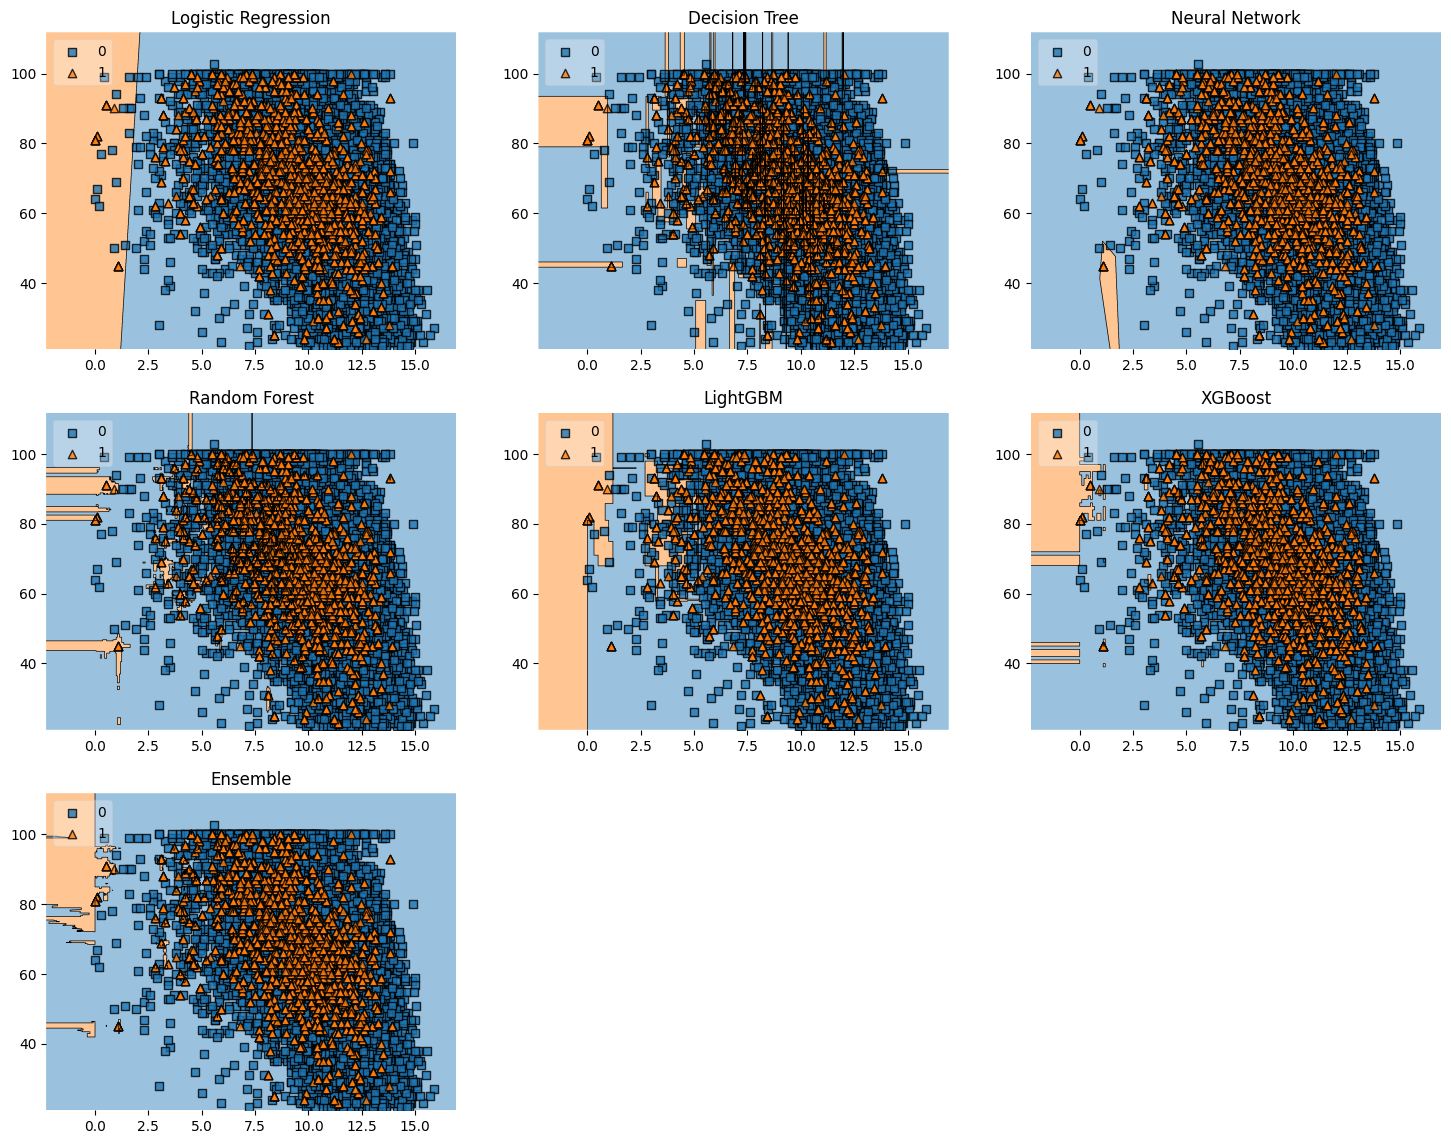

In [44]:
# Plotting Decision Regions
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Logistic Regression',
          'Decision Tree',
          'Neural Network',
          'Random Forest',
          'LightGBM',
          'XGBoost',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6, eclf],
                         labels,
                         itertools.product([0, 1, 2],
                                           repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf,
                                filler_feature_values={2: 1.80},
                                filler_feature_ranges={2: 0.90},
                                legend=2)
    plt.title(lab)

plt.show()

<!-- This is your first markdown cell -->

<div style="margin-bottom: 35px;"></div>

<!-- This is your second markdown cell -->

<div style="background-color: #2D2D2D; color: #FFFFFF; padding: 10px; text-align: center; border-radius: 15px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0);">
  <h2 style="margin: 0; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-weight: bold;">Model Comparison</h2>
</div>

<!-- This is your first markdown cell -->
Model performance is assessed using:
  - Precision score
  - ROC_AUC
  - Cohen’s Kappa
  - Total run time
<div style="margin-bottom: 35px;"></div>

<!-- This is your second markdown cell -->

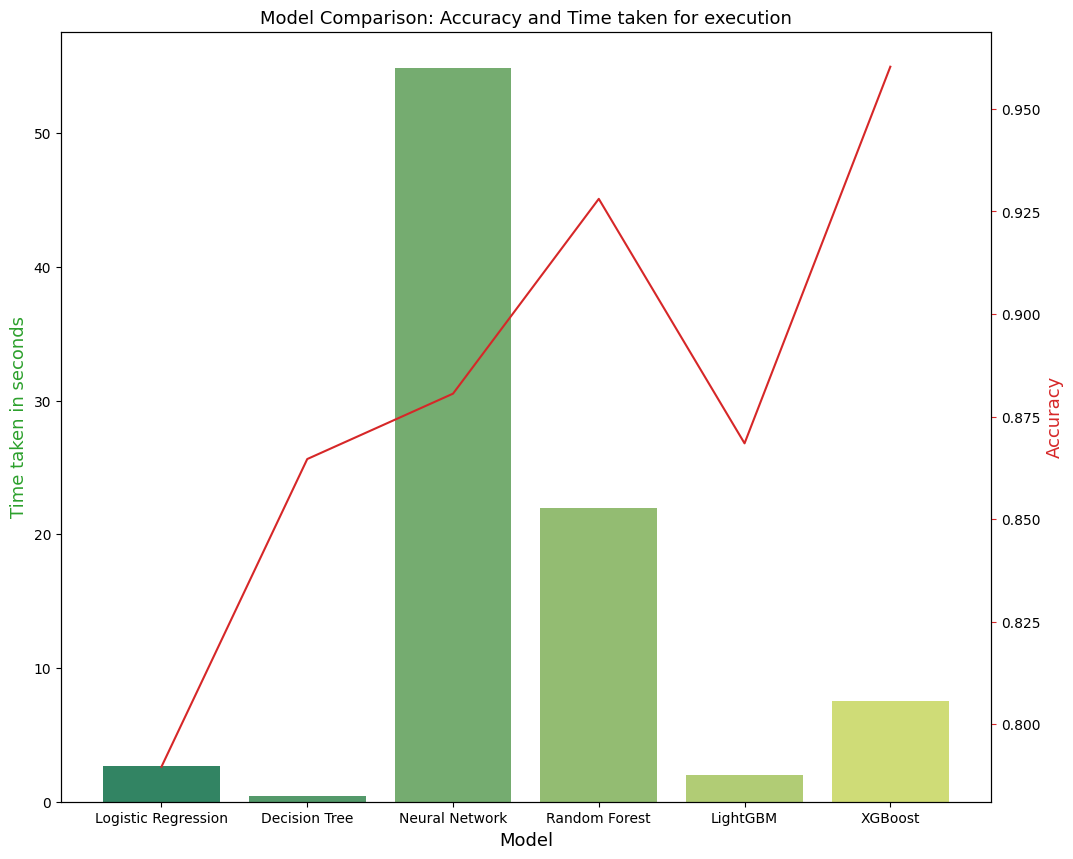

In [62]:
# Comparison of model's Accuracy and Time taken for execution.


accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_lgb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_lgb, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_nn, coh_kap_rf, coh_kap_lgb, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_nn, tt_rf, tt_lgb, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Neural Network','Random Forest','LightGBM','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken in seconds', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

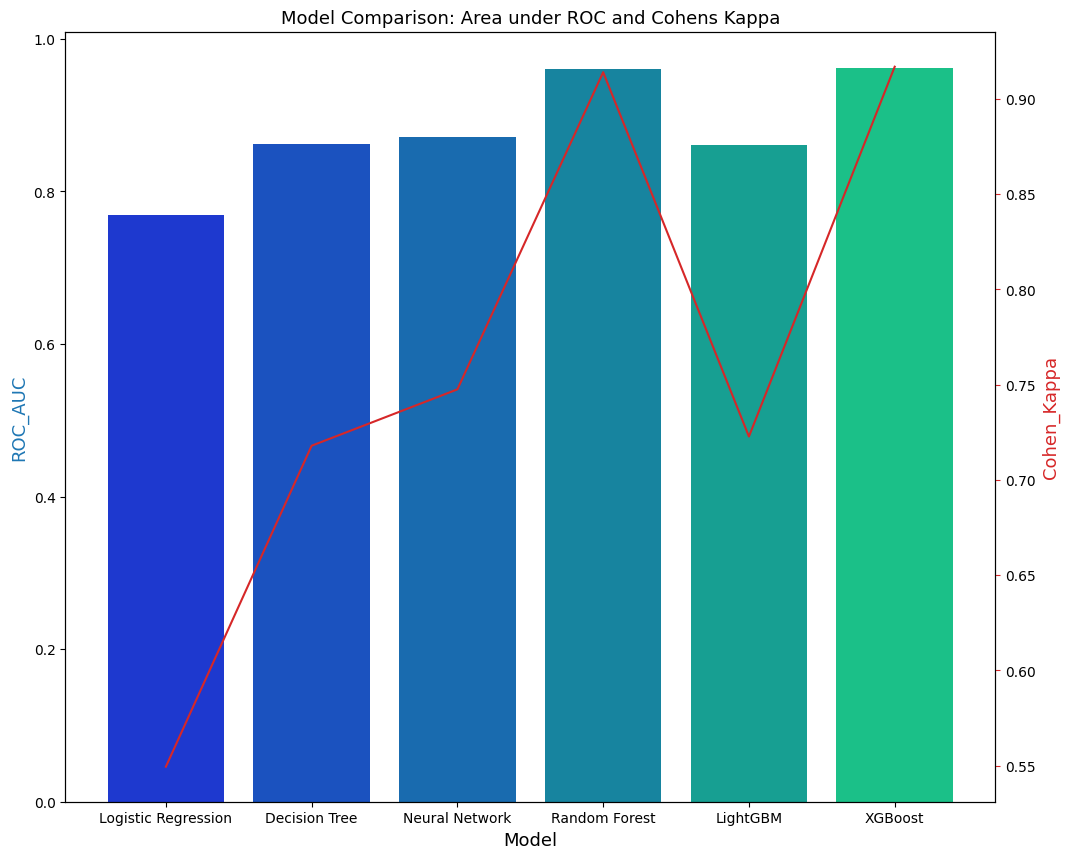

In [58]:
# Visualize model comparison: Area under ROC and Cohen's Kappa



fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

<div style="background-color: #2D2D2D; color: #FFFFFF; padding: 10px; text-align: center; border-radius: 15px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0);">
  <h2 style="margin: 0; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-weight: bold;">CONCLUSION </h2>
</div>

**<font size="4.99">We can observe that XGBoost and Random Forest performed better compared to other models. However, if speed is an important thing to consider, we can stick with XGBoost instead of Random Forest.</font>**


<div style="background-color: #2D2D2D; color: #FFFFFF; padding: 10px; text-align: center; border-radius: 15px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0);">
  <h2 style="margin: 0; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; font-weight: bold;">ThankYou </h2>
</div>